### Robust CNN Using Fashion MNIST
##### Mini Project 3 --- By Clayton Brittan

##### Dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist



## Topic: Building A Robust Versitile Model on Fashion MNIST

The goal of this project is to build Robust models. Robust model's are models that are versatile and can be used and applied to many situations. These model's generalize well for many use casses, and that is what we want when we build any sort of deep learning model. Many times when building models we only worry about how the model preforms on the test data however often times models are used on data that is in a different presentation than the test data that a model is exposed to. For this reason it is imperative that we build a model that can work reliably and accurately for many diferent situations. That is the goal of this project to create a model that is effective not only on the training and testing data but can accurately be used on unseen data.

When we want to build a model that can be utilized for real world applications it's important to make sure it's capable of taking on many different forms of data. In most real world applications the data that we use isn't standardized like it is in many of training sets, that is why we so heavily desire robustness in our models. Robust models are able to sift through the noise and produce accurate results even if the data is not to the model's preference. This makes models very useful for real life applications, which is the ultimate goal of a deep learning model. On top of being able to be used on a wide variety of data, robust models also allow for adapdability. Model's that focus primarly on a specific type or format of data do not allow for changes in the data, i.e. different sizes or angles in regards to image classification. This is impractical as there is constant variation in the data we collect for these models, so being able to adapt is an incredibly useful feature.

This project aims to build a robust model that is able to accurately classify Clothing items using the Fashion MNST dataset. A Robust model like this is useful for many uses, one example being able to visually sort clothing websites. Some reselling websites which allow users to post individual clothing items may miss catagorization due to human error on the poster's behalf. However with a model like this the consumer will still be able to sort and catagorize items regardless of whether the poster has included the classification.

My primary motivation for creating this model is to better understand the techniques and methods used to creat robust models. As well as how to evaluate and understand both numerically and graphically what makes a model robust and how to optimize the model's parameters to favor adapdability. 

In [304]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### DATA
##### Datset: https://www.kaggle.com/datasets/zalando-research/fashionmnist


The dataset I chose was the Fashion MNIST Dataset, this dataset aims to replace the original MNIST dataset as image size and structure of the MNIST dataset. This makes it easy to use for Machine Learning problems as we already have experience utilizing MNIST. 

The dataset consists of 70,000 Images, each consisting of 28 by 28 pixels for a total of 784 pixels in total. Each pixel contains a single channel representing the pixel's Brightness value, ranging between 0 (dark) and 255 (bright). Each image has a designated class label, and there are 10 class labels in total, the class labels are:

    Class Labels: 
    0	T-shirt/top
    1	Trouser
    2	Pullover
    3	Dress
    4	Coat
    5	Sandal
    6	Shirt
    7	Sneaker
    8	Bag
    9	Ankle boot

The dataset is a part of the Keras datasets library which makes it easy to load and split into training and testing data for the purpose of our model.


In [351]:
# Initialize Class Labels as a dictionary
labels = {0: "T-shirt/top", 
        1: "Trouser", 
        2: "Pullover", 
        3: "Dress", 
        4: "Coat", 
        5: "Sandal", 
        6: "Shirt", 
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot"}

# Intialize Class Labels as a List
classNames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### Data Cleaning and EDA

For our dataset we will first partition it into our trainging and testing sets, this is done easily using the Keras datasets library. Once our data is loaded we can inspect it to make sure that it is of the form we expect. We can check the amount of class labels, and we see that it in fact has 10 unique class labels. Since we want to convert the class labels to their class names we can One Hot Encode the class label values so that we can easily apply our class names and get the english name of the image's class. Because we are going to be using this data for a Convolutional Nueral Network, we will see better preformance if we normalize the values, so we divide the values by 255 to get them to now be between 0 and 1.

In [250]:
# Load and split the dataset into testing and training data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check for correct number of classes
num_classes = len(np.unique(y_train))
print(num_classes)


# One Hot encoding label data 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Normalize the Greyscale values from 0-255 to 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(y_train[0])

10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Next we can check for missing values within our dataset, and potentially remove them. However, since our dataset does not contain any missing values we can proceed as normal.

In [352]:
Do_We_Have_Null_Values = None in X_train and None in X_test and None in y_train and None in y_test
if Do_We_Have_Null_Values == False:
    print("There are no Null Values in the dataset (X_train, X_test, y_train, y_test)")
else:
    print("Yall got so many Null values, lol couldn't be me.")

There are no Null Values in the dataset (X_train, X_test, y_train, y_test)


Next to get a better understanding of the data we can take a look at the shape of each data point, and ensure they are in fact 28x28 pixel images. We can see that the data is in fact a 28x28 image with 10 unique classes. To further understand the data we can take a look at a random sample of the data and the class labels associated. As we can tell the visual information in each image is limited and therefor we must take extra care in recognizing patterns within the data to improve our predictive capabilities. Because we want to build a robust model this limited image format may be problematic when introducing unseen data, therefor we must ensure that our unseen data is of the same format as the original data.

Each entry of the data is of size 28 by 28 where each entry contains greyscale values 

Each entry represents an image of 784 pixels that can be classified into 10 different classes

 Here are some examples of the images in the dataset


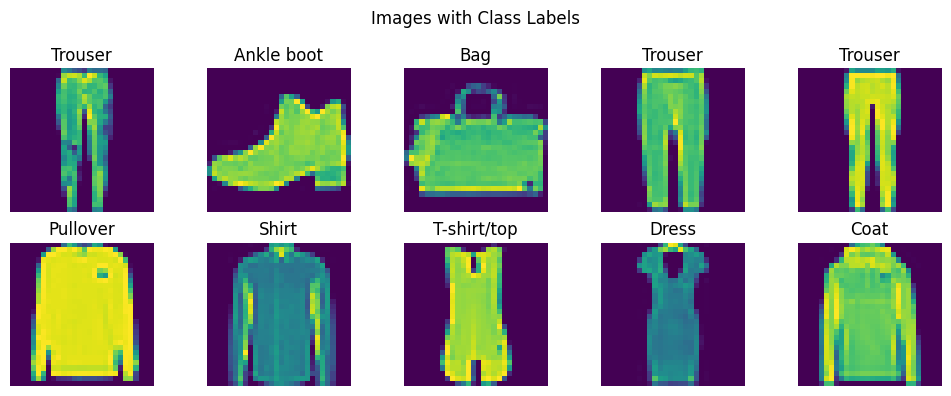

In [353]:
import random
# Print the shape and format of data
data_shape = X_test[0].shape

print(f"Each entry of the data is of size {data_shape[0]} by {data_shape[1]} where each entry contains greyscale values \n")

print(f"Each entry represents an image of {data_shape[0]**2} pixels that can be classified into {num_classes} different classes")

print(f"\n Here are some examples of the images in the dataset")

# Initialize figure to 2 rows of 5 axes
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
# Initialize random indexes for phot selection
randList = random.sample(range(100), 10)

# Initialize loop to plot image and label
for i in range(10):
    image = X_train[randList[i]] 
    
    row = i // 5  
    col = i % 5  

    axes[row, col].imshow(image)

    class_index = np.argmax(y_train[randList[i]])

    axes[row, col].set_title(classNames[class_index])
    axes[row, col].axis('off')
# Give figure title
fig.suptitle('Images with Class Labels', fontsize=12)
plt.tight_layout()
plt.show()

### Model Choice

For this task we choose to use a convolutional nueral network as it exceeds at image classification, It also allows for great amounts of individual customization at each individual layer. This allows us to finely tweak each model to meet our indiviudal problems needs. In this project we compare 3 different models in terms of accuracy and robustness. Our model's will be tested using both training and validation accuracy and traing and validation loss to measure the model's efficacy. To measure the model's robustness we can use a selection of 10 images I have scrapred from the internet that fall into one of the 10 class labels. These images are formated into the correct size and grayscale prior to testing. However the transformation of these images causes some information loss and introduces noise however since we want our model to be robust and versitile this is concidered an extra challenge for the model. 

### Model 1 Building

For our first model we create a basic CNN model with only one convolution layer, this serves as a simple benchmark for our later models. This model preforms okay on the test data and slightly worse on the testing data. We use Relu activation as it is the most efficient in most cases and is perfect for this problem. We then flatten the layers and add a dense layer also using Relu, then finally use Softmax to create our final probability distribution. We also use the Adam optmizer as it is very versatile for many different types of models and fits the purpose of this problem.


In [354]:
model = Sequential([
  layers.Input((28, 28, 1)),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [355]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_104 (Conv2D)             │ (None, 28, 28, 16)     │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_104               │ (None, 14, 14, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_47 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │        50,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,394 (196.85 KB)

 Trainable params: 50,394 (196.85 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

We have a final model with more than 50,000 trainable parameters, we can then build our model and fit our model on the training data and evaluate it on the test data. We use 10 epochs to limit the computation time. 

In [356]:
epochs=10
history = model.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6979 - loss: 0.8845 - val_accuracy: 0.7941 - val_loss: 0.5765
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8099 - loss: 0.5309 - val_accuracy: 0.7986 - val_loss: 0.5481
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8189 - loss: 0.5076 - val_accuracy: 0.8071 - val_loss: 0.5367
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8216 - loss: 0.4946 - val_accuracy: 0.8153 - val_loss: 0.5221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8267 - loss: 0.4784 - val_accuracy: 0.8155 - val_loss: 0.5236
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8300 - loss: 0.4716 - val_accuracy: 0.8186 - val_loss: 0.5093
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8335 - loss: 0.4573 - val_accuracy: 0.8233 - val_loss: 0.5057
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8339 - loss: 0.4591 - 

We can then evualuate the model by plotting the model accuracy and loss of both the training data and the test data. What we can see is that the model would be improved via more epochs however we can see that our Loss values begin to flatten our after only 10 epochs, this implies our model is underfitting the data. Because of this we can introduce more layers and more convolution to create a model that fits the data better. 

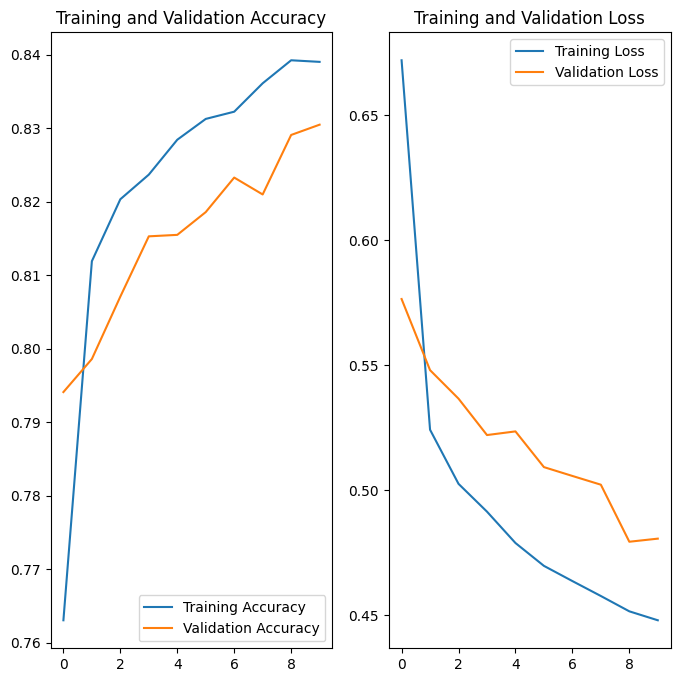

In [357]:
# Get accuracy and val_accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get loss and val_loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Set range to number of epochs
epochs_range = range(epochs)

# Plot data and label axes and title
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [358]:
# Print loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8353 - loss: 0.4685
Test accuracy: 0.8305000066757202


To test the models Robustness we can use unseen data using the same image format and that fit's into the predefined class labels. If the model accurately labels the unseen data we know it is a robust and versatile model. This current model only predicts 3 of the unseen images correctly, those being T_shirt.png, and Bag.png. This means our current model only has a 20% accuracy on the unseen data, we can try to do better by improving our model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: sandal.png - Prediction: Bag


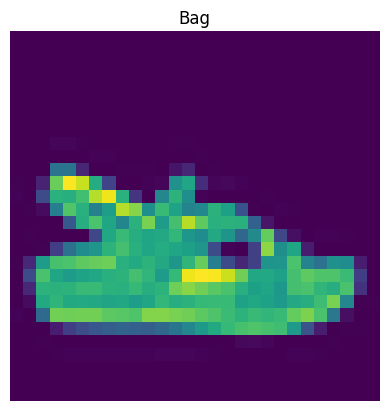

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Image: shirt.png - Prediction: Coat


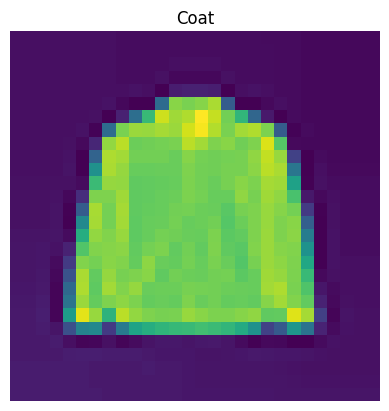

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Image: pullover.png - Prediction: Coat


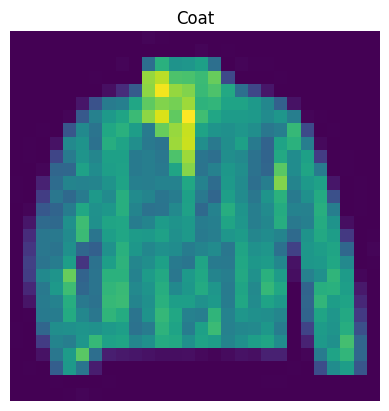

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: t-shirt.png - Prediction: T-shirt/top


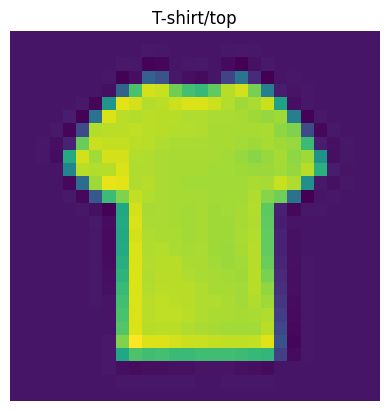

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: coat.png - Prediction: Shirt


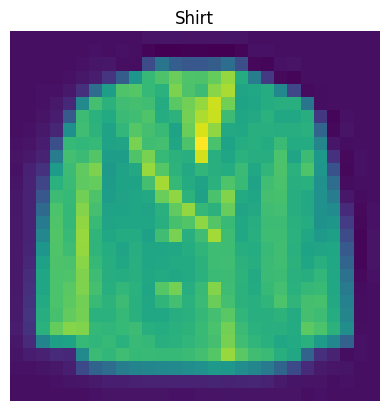

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: sneaker.png - Prediction: Sandal


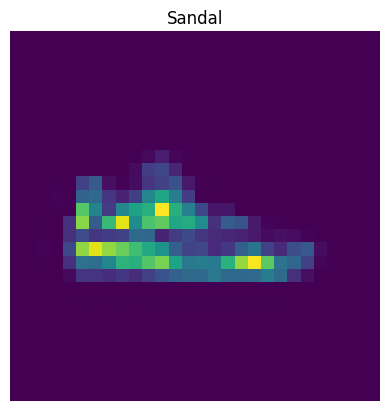

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: dress.png - Prediction: Shirt


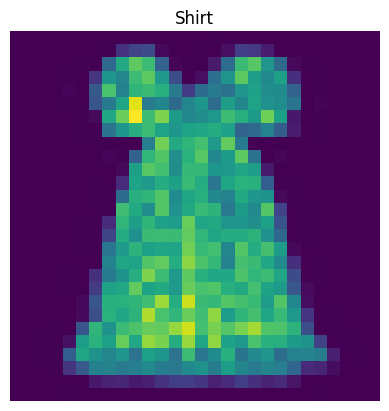

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: ankle_boot.png - Prediction: Bag


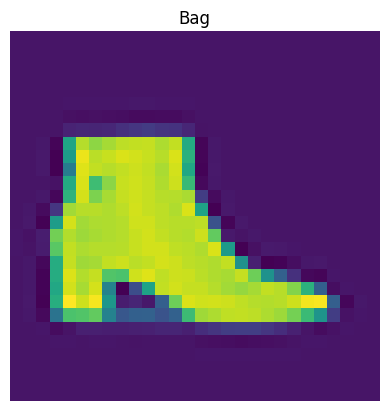

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: bag.png - Prediction: Bag


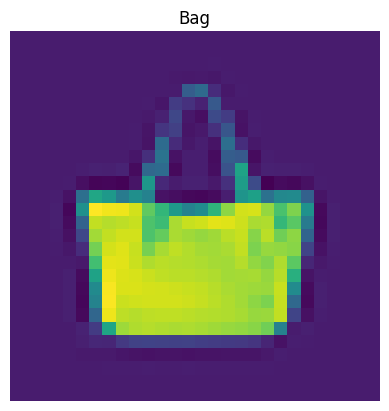

In [379]:

# Path to the folder containing unseen images
unseen_folder_path = "Unseen"

# Loop through all files in the folder
for filename in os.listdir(unseen_folder_path):
  # Check if it's an image file
  if filename.lower().endswith((".png")):
    # Full path to the image
    image_path = os.path.join(unseen_folder_path, filename)
    
    # Open the image and convert to grayscale
    image = Image.open(image_path).convert('L')

    inverted_image = image.point(invert)
    image = inverted_image

    # Process the image data
    image_data = np.array(image)
    image_data = np.array(image.resize((28, 28), Image.LANCZOS))
    image_data_batched = image_data.reshape((1, 28, 28, 1))
    image_data_batched = image_data_batched.astype('float32') / 255.0

    # Get prediction and class label
    prediction = model.predict(image_data_batched)
    prediction = np.argmax(prediction)
    prediction = classNames[prediction]

    # Print the filename and prediction
    print(f"Image: {filename} - Prediction: {prediction}")

    # Optionally, display the image with prediction
    plt.title(prediction)
    plt.axis('off')
    plt.imshow(image_data)
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8


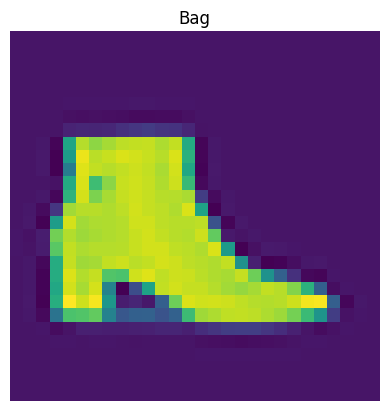

In [334]:
# Open custom Image for model testing
image = Image.open("image.png").convert('L')

def invert(pixel):
  return 255 - pixel

inverted_image = image.point(invert)
image = inverted_image

# Format Image data for model
image_data = np.array(image)
image_data = np.array(image.resize((28, 28), Image.LANCZOS))

image_data_batched= image_data.reshape((1,28, 28, 1))
image_data_batched = image_data_batched.astype('float32') / 255.0


# Get Prediction from Model and assign it's class value to the label
prediction = model.predict(image_data_batched)
prediction = np.argmax(prediction)
print(prediction)

# Show image and give it a title
prediction = classNames[prediction]
plt.title(prediction)
plt.axis('off')
plt.imshow(image_data)

### Model 2 Building

For our second model we introduce a second convolution and pooling layer, we also increase the amount of convolution nureons per layer. This model is more complex than our first model, it also relies on Relu activation during the convolution layers, and softmax for our final prediciton distribution.

In [335]:
modelV2 = Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [336]:
modelV2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelV2.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_99 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 5, 5, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_45 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model 2 Training

For our second model we have more than quadruple the trainable parameters as the first model. We fit the model on the data using the same number of epochs and analyze the model using both loss and accuracy. 

In [337]:
epochs=10
historyV2 = modelV2.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7786 - loss: 0.6165 - val_accuracy: 0.8740 - val_loss: 0.3508
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8880 - loss: 0.3071 - val_accuracy: 0.8935 - val_loss: 0.2935
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9048 - loss: 0.2570 - val_accuracy: 0.8979 - val_loss: 0.2807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9189 - loss: 0.2218 - val_accuracy: 0.9073 - val_loss: 0.2596
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9281 - loss: 0.1979 - val_accuracy: 0.9047 - val_loss: 0.2558
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9362 - loss: 0.1738 - val_accuracy: 0.9080 - val_loss: 0.2644
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9448 - loss: 0.1494 - val_accuracy: 0.9086 - val_loss: 0.2589
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9505 - loss: 0.130

Again we plot the model's accuracy and loss for both the training and validation data. We see that the model quickly aproaches 100% accuracy on the training data, yet the validation data remains stagnant. The same can be said for the model's loss values, with the training loss decreasing far quicker than the validation data. This creates a gap between the training and testing accuracies and loss. This implies our model is now overfitting the data, and it appears we have a classic Goldilocks problem on our hands. This means to create an optimal model we will need to find a medium between the current and previous models in terms of layers and convolution. 

In regards to the unseen data the current model also outpreforms the first model in that it now accuraretly predicts Dress.png, T_shirt.png, Bag.png, and Sandal.png. This means our current model has a 40% accuracy measure on the unseen data. In terms of robustness on unseen data this model is twice as effective, however we can do better.

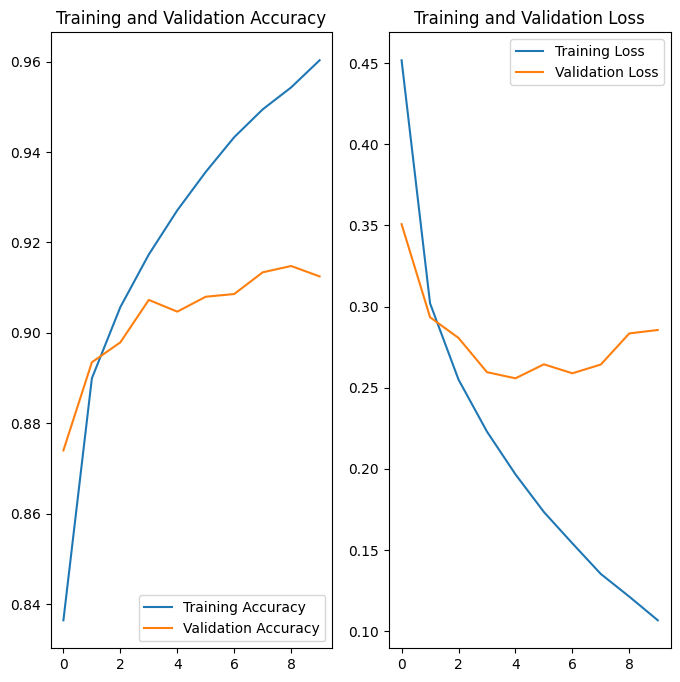

In [365]:
# Get accuracy and val_accuracy from history
acc = historyV2.history['accuracy']
val_acc = historyV2.history['val_accuracy']

# Get loss and val_loss from history
loss = historyV2.history['loss']
val_loss = historyV2.history['val_loss']

# Set range to number of epochs
epochs_range = range(epochs)

# Plot data and label axes and title
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [366]:
# Print loss and accuracy
loss, accuracy = modelV2.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.2941
Test accuracy: 0.9125000238418579


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Image: sandal.png - Prediction: Sandal


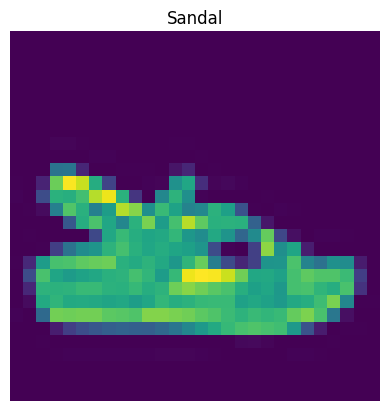

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: shirt.png - Prediction: Coat


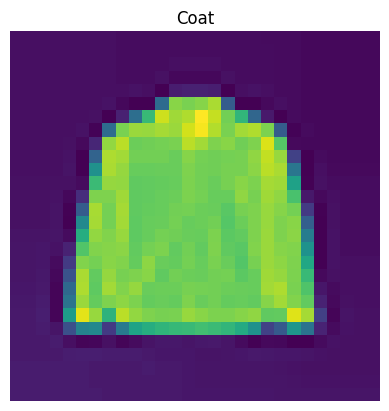

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Image: pullover.png - Prediction: Coat


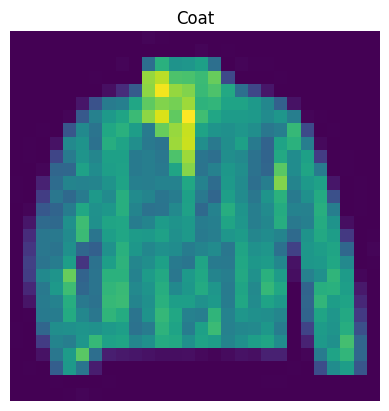

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: t-shirt.png - Prediction: T-shirt/top


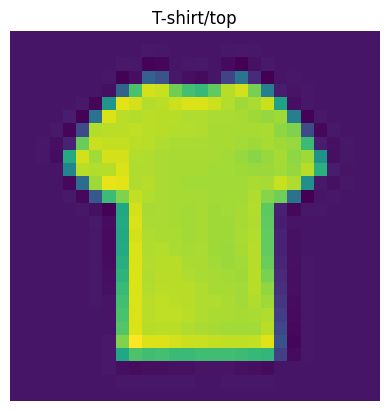

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: coat.png - Prediction: Shirt


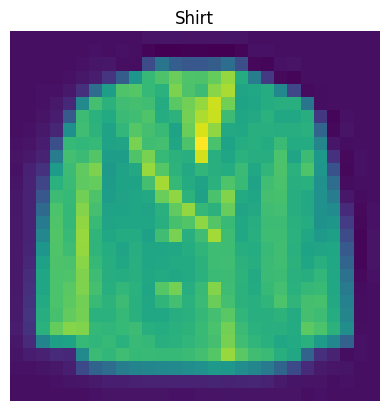

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: sneaker.png - Prediction: Sandal


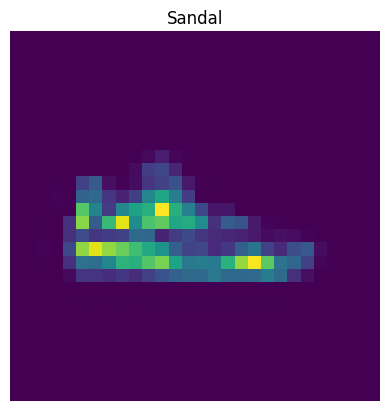

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: dress.png - Prediction: Dress


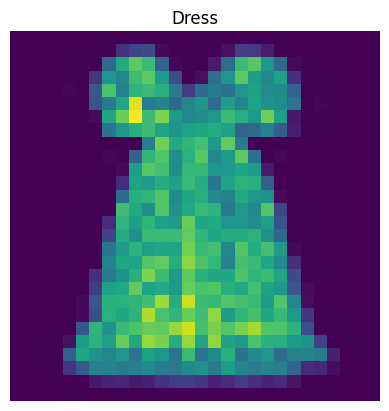

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Image: ankle_boot.png - Prediction: T-shirt/top


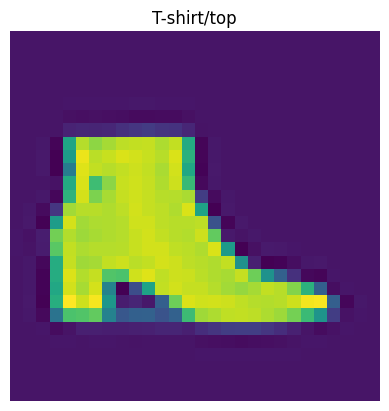

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: bag.png - Prediction: Bag


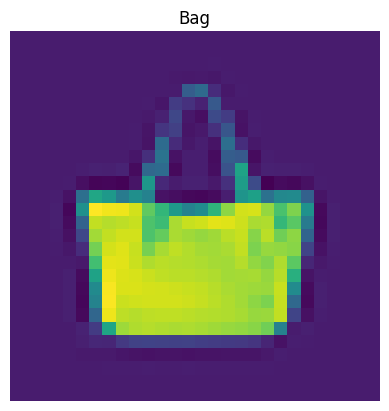

In [380]:

# Path to the folder containing unseen images
unseen_folder_path = "Unseen"

# Loop through all files in the folder
for filename in os.listdir(unseen_folder_path):
  # Check if it's an image file
  if filename.lower().endswith((".png")):
    # Full path to the image
    image_path = os.path.join(unseen_folder_path, filename)
    
    # Open the image and convert to grayscale
    image = Image.open(image_path).convert('L')

    inverted_image = image.point(invert)
    image = inverted_image

    # Process the image data
    image_data = np.array(image)
    image_data = np.array(image.resize((28, 28), Image.LANCZOS))
    image_data_batched = image_data.reshape((1, 28, 28, 1))
    image_data_batched = image_data_batched.astype('float32') / 255.0

    # Get prediction and class label
    prediction = modelV2.predict(image_data_batched)
    prediction = np.argmax(prediction)
    prediction = classNames[prediction]

    # Print the filename and prediction
    print(f"Image: {filename} - Prediction: {prediction}")

    # Optionally, display the image with prediction
    plt.title(prediction)
    plt.axis('off')
    plt.imshow(image_data)
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0


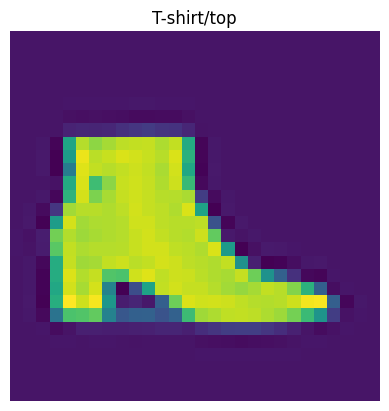

In [368]:
# Open custom Image for model testing
image = Image.open("image.png").convert('L')

inverted_image = image.point(invert)
image = inverted_image
# Format Image data for model
image_data = np.array(image)
image_data = np.array(image.resize((28, 28), Image.LANCZOS))

image_data_batched= image_data.reshape((1,28, 28, 1))
image_data_batched = image_data_batched.astype('float32') / 255.0


# Get Prediction from Model and assign it's class value to the label
prediction = modelV2.predict(image_data_batched)
prediction = np.argmax(prediction)
print(prediction)

# Show image and give it a title
prediction = classNames[prediction]
plt.title(prediction)
plt.axis('off')
plt.imshow(image_data)

### Results and Analysis of 2 Models

We can plot the values of the accuracy and loss for both models over all epochs and what we can see is that our second model outpreforms our first in terms of both accuracy and loss. Our second model has less 70% of the loss of the original and more than 10% more accuracy over all epochs. We chose accuracy and loss as they directly measure the amount of correct labels over the data. Since this is an image classififaction model we are primarly concerned with correct classifications, for this reason we will use accuracy and loss as our primary measure of the model's efficacy.

On top of the two direct model measurements we are measuring the model's robustness using unseen data. This is measured visually by comparing the correct image labels with the model's prediction and counting the correct images over the 10 total images used. While this is not a direct measurement of a model's robustness it serves as a way of measuring the model's adapability by measuring accuracy on new unseen data.

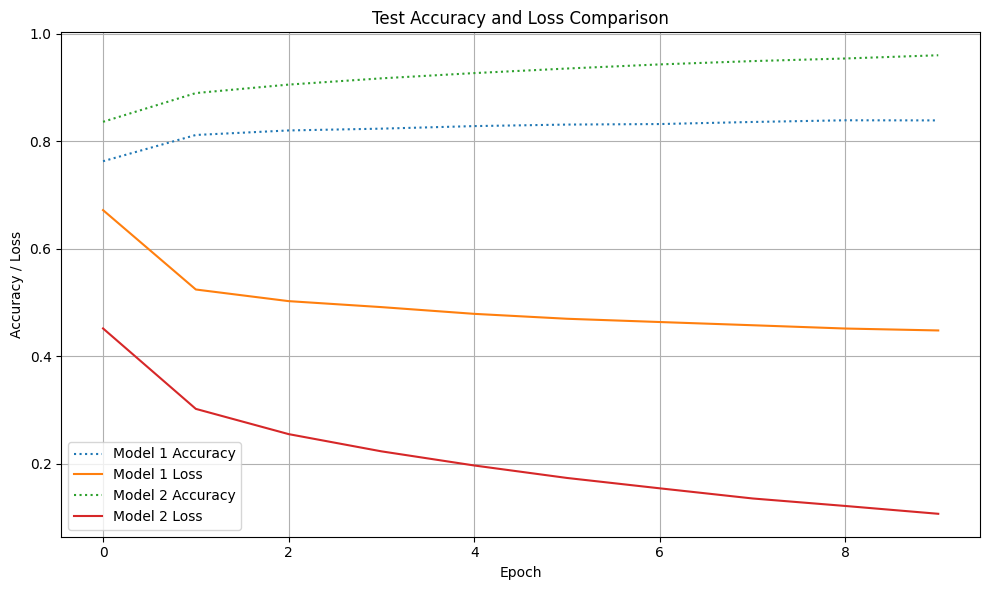

In [369]:

# Function to plot each model's history, takes in Model.history value and the desired label
def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=label+' Accuracy', linestyle = ':')
    plt.plot(history.history['loss'], label=label+' Loss')
    plt.legend()

# Get model data from history 
model1_history = history
model2_history = historyV2

# Size figure
plt.figure(figsize=(10, 6))

# Plot the model data using plot_history
plot_history(model1_history, 'Model 1')
plot_history(model2_history, 'Model 2')

# Plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Test Accuracy and Loss Comparison')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Model 3 Building

For our third model we want to try to improve the model's robustness on top of the generalized preformance of the model. We saw earlier that our second model overfitted the data, so we will decrease the amount of convolution per layer to try to reduce the overfitting. To improve our model's robustness we introduce several new layers and techniques in an attempt to improve versatility. The first of these methods is data augmentation, we aim to increase the amount of data our model has access to by artificially generating data through a horizontal and vertical flip of the original data. This increases the amount of data our model has to work with. On top of augmentation we introduce batch normalization after our first convolution layer. Batch normalization normalizizes the activation of nuerons in the layer, this can lead to improved robustness and generalizability of the model. We also introduce L2 regularization into our final convolution layer, this prevents the model from learning simple patterns and encourages it to look for more complex patterns in the data. This improves the generalizability of the model. Finally we introduce a dropout layer that randomly drops some of the nuerons during training, this has a similar effect as the L2 regularization and helps prevent overfitting while improving the model's robustness.

In [370]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, BatchNormalization, Dropout

from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

modelV3 = Sequential([
    layers.Input(shape=(28, 28, 1)),

    RandomFlip("horizontal"),

    RandomFlip("vertical"),

    layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    
    layers.BatchNormalization(),
    
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.001)),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

In [371]:
modelV3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelV3.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_42 (RandomFlip)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_43 (RandomFlip)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 13, 13, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_106               │ (None, 5, 5, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_48 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,778 (221.79 KB)

 Trainable params: 56,746 (221.66 KB)

 Non-trainable params: 32 (128.00 B)

### Model 3 Training

We can see from the summary that our third model has a similar amount of trainable parameters as our first model. On top of this we introduce one more method to improve our model. This is a learning rate redcution callback parameter during our fitting process. By reducing our learning rate as the model trains we are preventing overfitting, this can help the model in general which could further improve robustness. Just as the other two models we analyze using accuracy and loss of both the training and testing data.

In [372]:
epochs=10
historyV3 = modelV3.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs,
  callbacks=[learning_rate_reducer]
  
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7185 - loss: 0.7905 - val_accuracy: 0.8406 - val_loss: 0.4524 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8395 - loss: 0.4625 - val_accuracy: 0.8330 - val_loss: 0.4588 - learning_rate: 0.0010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8575 - loss: 0.4160 - val_accuracy: 0.8645 - val_loss: 0.3880 - learning_rate: 0.0010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8663 - loss: 0.3853 - val_accuracy: 0.8721 - val_loss: 0.3806 - learning_rate: 0.0010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8714 - loss: 0.3725 - val_accuracy: 0.8777 - val_loss: 0.3563 - learning_rate: 0.0010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8807 - loss: 0.3455 - val_accuracy: 0.8824 - val_loss: 0.3480 - learning_rate: 0.0010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8810 - l

Again we compare the accuracy and loss for training and testing data. While the values are lower than the second model, both the training and testing accuracy are in line, this means that our model preforms just as well on the test data as with the training data. The same can be said about the model's loss as the loss on both the training and testing data follow the same tragectory. This implies we have properly mitingated overfitting.

Additionaly our model preforms better on our unseen data. Our model correctly identifies Sandal.png, T_shirt.png, Dress.png, Ankle_boot.png, and Bag.png. If we go by our previous measurements this model has 60% accuracy on the unseen data. However it is important to note that the incorrect guesses aren't as incorect as they could have been. In other words the incorrect guesses are only slightly off. As seen below the guesses for the incorrectly labeled images shirt.png, coat.png, pullover.png and sneaker.png all guess something similar. Shirt.png and pullover.png are both labeled coat and Coat.png is labeled shirt, similarly Sneaker.png is labeled sandal. So our model is pretty good at classifying unseen data.

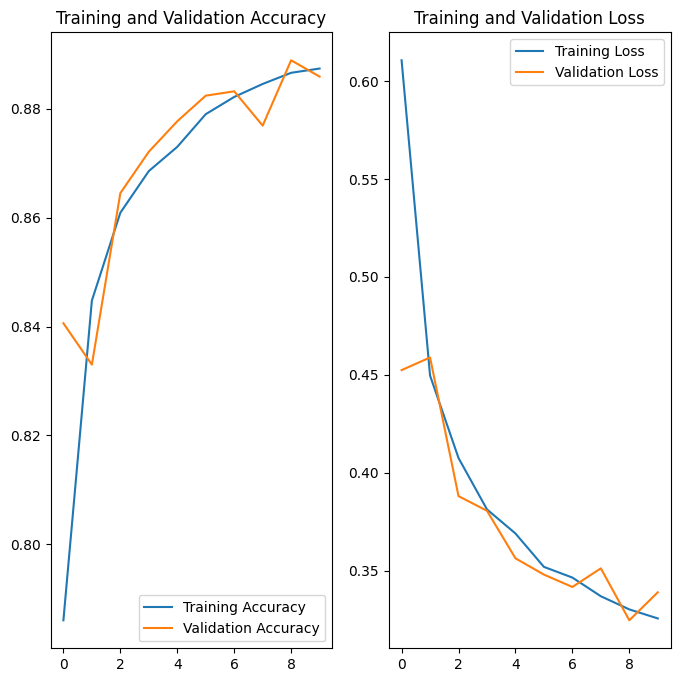

In [375]:
# Get accuracy and val_accuracy from history
acc = historyV3.history['accuracy']
val_acc = historyV3.history['val_accuracy']

# Get loss and val_loss from history
loss = historyV3.history['loss']
val_loss = historyV3.history['val_loss']

# Set range to number of epochs
epochs_range = range(epochs)

# Plot data and label axes and title
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [376]:
# Print loss and accuracy
loss, accuracy = modelV3.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8870 - loss: 0.3368
Test accuracy: 0.8859000205993652


### Results and Analysis of 3 Models

As we can see from the graph the 2nd model still holds the top spot in terms of both accuracy and loss on the dataset. However this is primarily due to overfitting. While we know that the third model worked best on the unseen data and therefor is the most robust. The third model would benifit from a greater number of epochs where as the 2nd model would not. The Loss and Accuracy measures of each of the models also doesn't tell the full story.

As we added more convolution to the model we increased accuracy on the training data but had little effect on the testing data, and on unseen data. This means that simply adding more layers and convolution wasn't enough we had to train our model to recognize more complex patterns in the data. This is why in the third model reduced the amount of nuerons in the convolution layers. 

On top of this the general goal of the model was to be able to properly classify Unseen data, Because of this we have to assess the three models on the self designed Unseen data accuracy. 
The results of the models are:

    Model 1 - 20% Accuracy on Unseen Data
    Model 2 - 40% Accuracy on Unseen Data
    Model 3 - 60% Accuracy on Unseen Data

As we added more layers to improve the model's robustness and reduce overfitting, we also improved the model's preformance on unseen data. On top of raw accuracy the model's also got better in their guesses. Where as models 1 & 2 thought that Ankle_boot.png was a bag and a t_shirt respectively, model 3 was able to accurately classify it. This proves that the data augmentation and L2 regularization and drop out steps provided the model with significant enough complex pattern recognition that it was able to outperform the models without it. 

We can see that models with more data augmentation, regularization and normalization tend to preform better in generalized purposes than models without it.

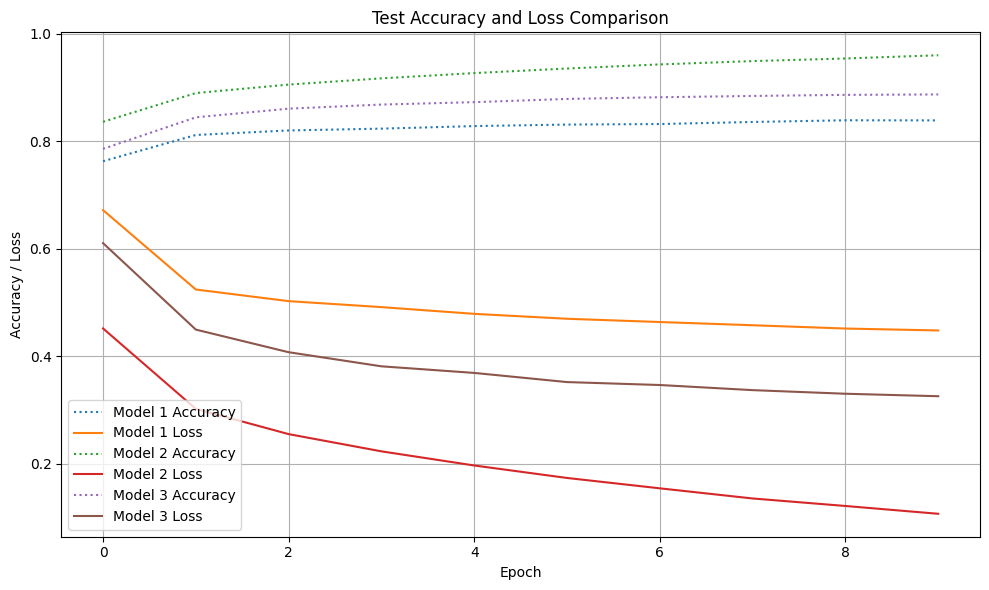

In [384]:

# Function to plot each model's history, takes in Model.history value and the desired label
def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=label+' Accuracy', linestyle = ':')
    plt.plot(history.history['loss'], label=label+' Loss')
    plt.legend()

# Get model data from history 
model1_history = history
model2_history = historyV2
model3_history = historyV3

# Size figure
plt.figure(figsize=(10, 6))

# Plot the model data using plot_history
plot_history(model1_history, 'Model 1')
plot_history(model2_history, 'Model 2')
plot_history(model3_history, 'Model 3')

# Plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Test Accuracy and Loss Comparison')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image: sandal.png - Prediction: Sandal


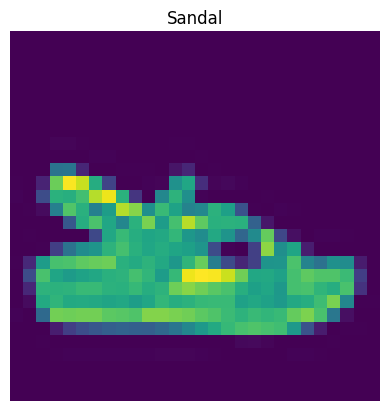

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: shirt.png - Prediction: Coat


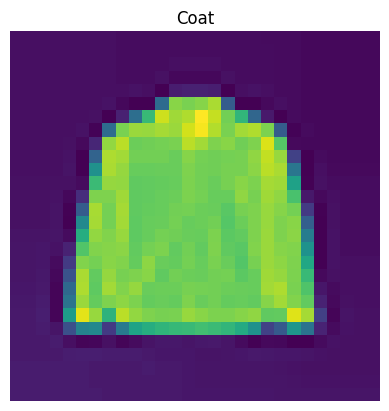

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: pullover.png - Prediction: Coat


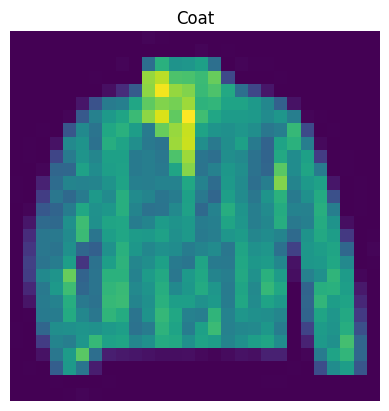

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: t-shirt.png - Prediction: T-shirt/top


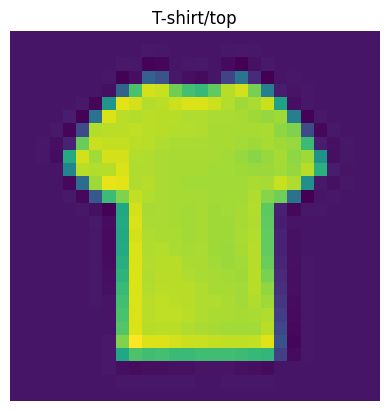

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Image: coat.png - Prediction: Shirt


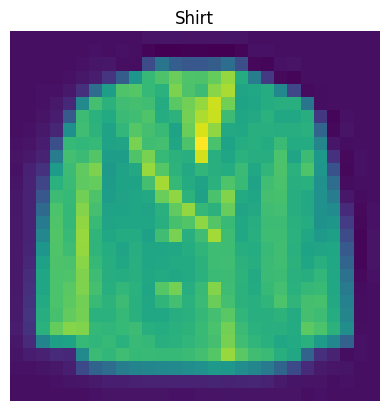

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: sneaker.png - Prediction: Sandal


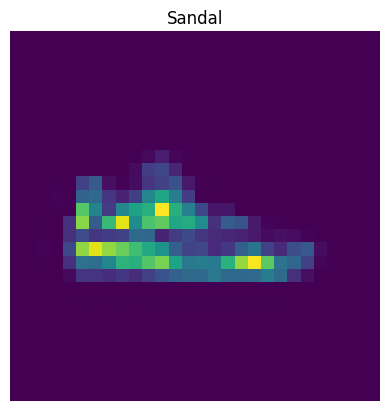

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: dress.png - Prediction: Dress


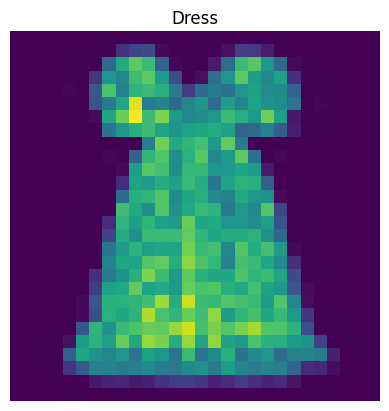

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Image: ankle_boot.png - Prediction: Ankle boot


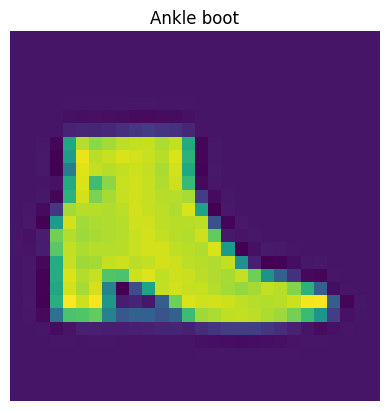

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Image: bag.png - Prediction: Bag


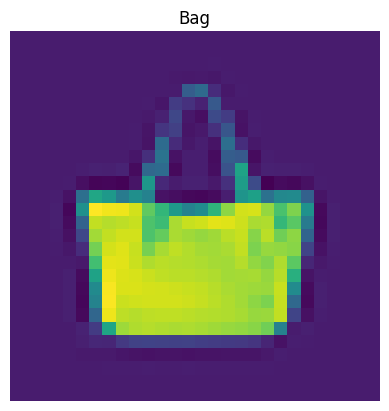

In [385]:

# Path to the folder containing unseen images
unseen_folder_path = "Unseen"

# Loop through all files in the folder
for filename in os.listdir(unseen_folder_path):
  # Check if it's an image file
  if filename.lower().endswith((".png")):
    # Full path to the image
    image_path = os.path.join(unseen_folder_path, filename)
    
    # Open the image and convert to grayscale
    image = Image.open(image_path).convert('L')

    inverted_image = image.point(invert)
    image = inverted_image

    # Process the image data
    image_data = np.array(image)
    image_data = np.array(image.resize((28, 28), Image.LANCZOS))
    image_data_batched = image_data.reshape((1, 28, 28, 1))
    image_data_batched = image_data_batched.astype('float32') / 255.0

    # Get prediction and class label
    prediction = modelV3.predict(image_data_batched)
    prediction = np.argmax(prediction)
    prediction = classNames[prediction]

    # Print the filename and prediction
    print(f"Image: {filename} - Prediction: {prediction}")

    # Optionally, display the image with prediction
    plt.title(prediction)
    plt.axis('off')
    plt.imshow(image_data)
    plt.show()



### Model 3 Further Training
Finally we will increase the number of epochs for the third model to see if this offers any improvements in the models performance on unseen data. We will train the model over 50 epochs and then analyze the results.

In [386]:
learning_rate_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

modelV3 = Sequential([
    layers.Input(shape=(28, 28, 1)),

    RandomFlip("horizontal"),

    RandomFlip("vertical"),

    layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    
    layers.BatchNormalization(),
    
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.001)),

    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

In [387]:
modelV3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelV3.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_44 (RandomFlip)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_45 (RandomFlip)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_107               │ (None, 13, 13, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_108               │ (None, 5, 5, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_49 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,778 (221.79 KB)

 Trainable params: 56,746 (221.66 KB)

 Non-trainable params: 32 (128.00 B)

In [388]:
epochs=50
historyV3 = modelV3.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs,
  callbacks=[learning_rate_reducer]
  
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7274 - loss: 0.7949 - val_accuracy: 0.8453 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8451 - loss: 0.4480 - val_accuracy: 0.8667 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8607 - loss: 0.4104 - val_accuracy: 0.8675 - val_loss: 0.3813 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8691 - loss: 0.3829 - val_accuracy: 0.8767 - val_loss: 0.3629 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8773 - loss: 0.3569 - val_accuracy: 0.8805 - val_loss: 0.3648 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8797 - loss: 0.3516 - val_accuracy: 0.8701 - val_loss: 0.3623 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8813 - 

What we can see is that after 50 epochs the models accuracy and loss continued to decrease, surpassing that of model 2. The model also continues to improve in both training accuracy and loss as well as the validation accuracy and loss implying that it could further be imrpoved from more epochs. However due to the limited processing power of my current machine this will suffice

### Discussion and Conclusion

When it comes to building robust models that are able to take in a wide variety of data and produce accurate results on a wide variety of both seen and unseen data it requires a delicate ballance of complexity and robustness. What we saw from the 3 models above is that depth and convolution in a deep learning model isn't enough to create a versatile model we also need to introduce other model layers to improve the generalizablility of the model. These layers include Batch normalization, Dropout layers and L2 regularization. On top of these layers we can also introduce data augmentation to give the model artificially more data to work with. Because we are introducing flipped and reversed versions of the data the model is more able to classify images regardless of their orientation. This is very useful for real world applications as the data being introduced to the model is not always uniform and to the model's optimal standards. 

This served as a great baseline for understanding Robustness when it comes to Machine Learning Models and more specifically robustness and generalizability in Convolutional Nueral Networks. This model could have further been improved to create better more reliable results through a couple of changes. First we could have utilized more epochs during the training period to further train the model and improve it's accuracy. In addition I could have utilized Ensemble Methods to combine multiple models to create a hybrid model with more generalizability. In addition the models could have likely been improved through further tweaking of the amount of layers and convolution within them, as well as experimenting with more normalization, regularization and augmentation.

The biggest barrier in achieving these improvements is computational complexity, running a model for more epochs takes a longer amount of time and more processing power. Then having to change model parameters and rebuild and train the model creates even more time needed to fully analyze and optimize the models. In the future perhaps utilizing gridsearch or randomsearch to automate the hyperparameter tuning process could be benificial.

Despite the potential improvements I am very pleased with the third model's ability to classify unseen data that I personally currated. This data was chosen arbitrarily so to see the model be able to accurately classify most of the data, and only be slightly off with the data it misclassified is more than acceptable. Moving forward I would like to apply what I have learned here about model robustness to my future machine learning models.